In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

dispSize = 10
plt.rcParams['figure.figsize'] = [dispSize*2, dispSize]

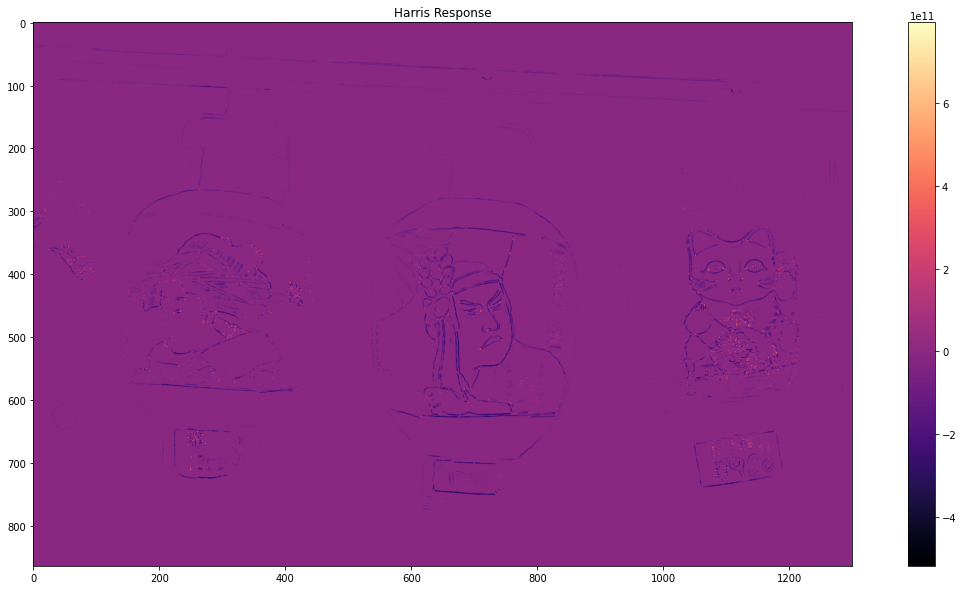

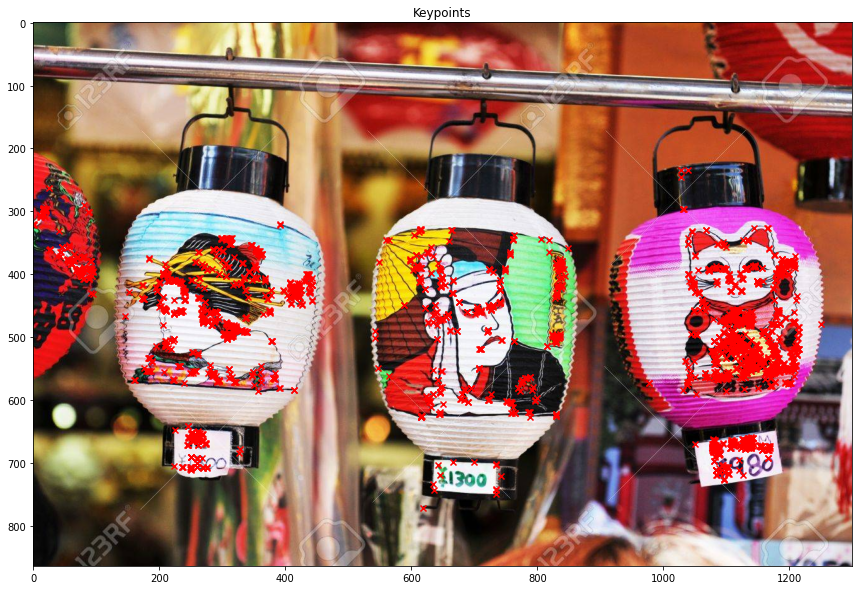

In [26]:
def harris(img,k,win_size):
    gray = img.copy().astype(np.float32)
    if img.shape[-1]>1:
        gray = cv2.cvtColor(gray,cv2.COLOR_RGB2GRAY)
        
    sobel = np.array([
        [1,0,-1],
        [2,0,-2],
        [1,0,-1]])
    i_x = cv2.filter2D(gray,-1,sobel) 
    i_y = cv2.filter2D(gray,-1,sobel.transpose()) 
    
    win_size = max(2,win_size)
    neigh_box = np.ones((win_size,win_size))
    
    i_xx = cv2.filter2D(np.square(i_x),-1,neigh_box)
    i_yy = cv2.filter2D(np.square(i_y),-1,neigh_box)
    i_xy = cv2.filter2D(i_x*i_y,-1,neigh_box)
    
    det_m = i_xx*i_yy-np.square(i_xy)
    trace_m = i_xx+i_yy

    R = det_m - k*np.square(trace_m)
    plt.imshow(R,cmap='magma')
    plt.colorbar()
    plt.title('Harris Response')
    plt.show()
    return R

bts_img = cv2.imread('japan_lamps.jpg')
bts_img = cv2.cvtColor(bts_img,cv2.COLOR_BGR2RGB)
    
hrs = harris(bts_img,0.06,2)
max_val = hrs.max()

corners = np.where(hrs>max_val*0.1)

plt.imshow(bts_img)
plt.title('Keypoints')
plt.scatter(corners[1],corners[0],c="r",marker='x')
plt.show()

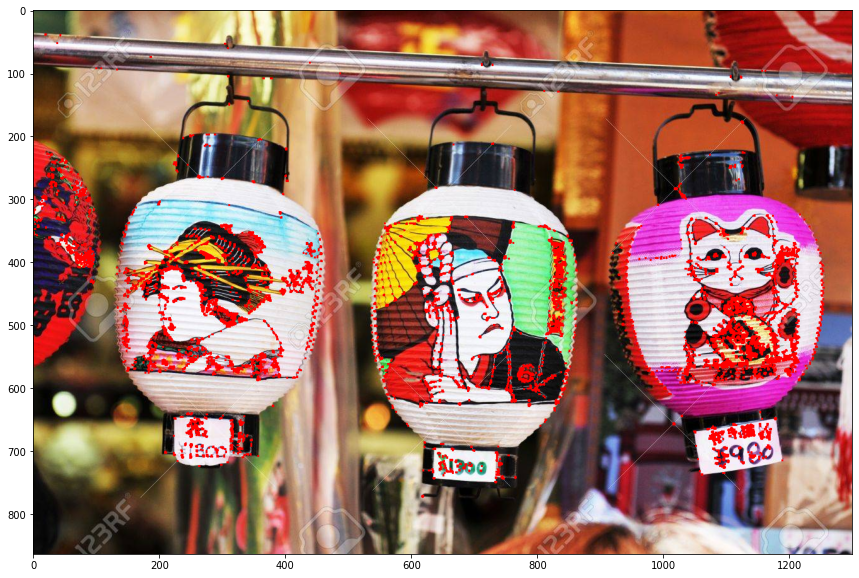

In [25]:
filename = 'japan_lamps.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)